$\newcommand{\AA}{\unicode{x212B}}$

# $\Delta$SCF Post-Processing (1D)

Now that the LumiWork is complete, it is time to analyze the results.
This first section shows how to do that following the so-called "single effective phonon mode model"
or "one-dimensional configuration coordinate diagram" (1D-CCM).
We recall that, in this model, it is assumed that there exists a fictitious effective phonon mode
whose eigenvectors follow exactly the ground-state to excited-state atomic relaxation,
with an eigenfrequency computed with equation {eq}`omega_eff_g_e`.
For this analysis, we use the $\Delta$SCF computations shown in the previous tutorial to instantiate a `DeltaSCF` object:

In [1]:
import warnings
warnings.filterwarnings('ignore')

from abipy.lumi.deltaSCF import DeltaSCF
scf_files=[
    "../workflows_data/flow_deltaSCF/w0/t2/outdata/out_GSR.nc",
    "../workflows_data/flow_deltaSCF/w0/t3/outdata/out_GSR.nc",
    "../workflows_data/flow_deltaSCF/w0/t4/outdata/out_GSR.nc",
    "../workflows_data/flow_deltaSCF/w0/t5/outdata/out_GSR.nc",
]

results = DeltaSCF.from_four_points_file(scf_files)

# or
#
# results = DeltaSCF.from_json_file("../workflows_data/flow_deltaSCF/w0/outdata/lumi.json")
#
# or only two relaxations
#
# results = DeltaSCF.from_relax_file(["../workflows_data/flow_deltaSCF/w0/t0/outdata/out_GSR.nc",
#                                     "../workflows_data/flow_deltaSCF/w0/t1/outdata/out_GSR.nc"])

```{note}
Energy units are given in eV, distances are in $\AA$.
```

## Total energies and electronic levels

The energies of the four relevant states are accessible with:

In [2]:
print(results.ag_energy,results.ag_star_energy, results.ae_energy, results.ag_star_energy)

-12934.332201652453 eV -12932.701536166687 eV -12934.277595698035 eV -12932.701536166687 eV


The electronic eigenenergies, if computed at a single k-point, typically $\Gamma$,
can be plotted with (spin up in black, spin down in red):

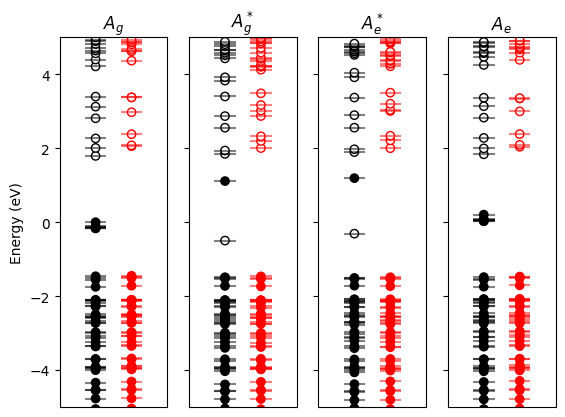

In [3]:
results.plot_eigen_energies(scf_files);

In the ground state, notice the 7 Eu$_{4f}$ states located in the gap.
In the excited state (simulated with constrained occupation, as shown with the (un)filled markers),
the created 4f hole lowers the energy of an occupied 5d state, which is now located at the top of the gap.
The 6 remaining occupied 4f states are pushed down in the VB.
If you have computed the four band structures associated to each point, you can use `results.plot_four_BandStructures(nscf_files)`
where `nscf_files` is the list of four band structures .nc files.

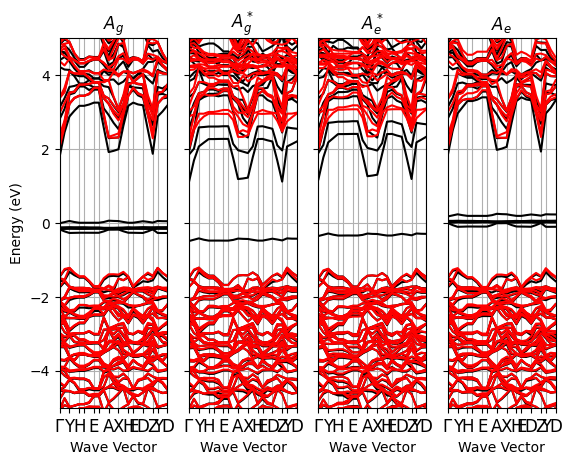

In [4]:
nscf_files = [
    "../workflows_data/flow_deltaSCF/w0/t6/outdata/out_GSR.nc",
    "../workflows_data/flow_deltaSCF/w0/t7/outdata/out_GSR.nc",
    "../workflows_data/flow_deltaSCF/w0/t8/outdata/out_GSR.nc",
    "../workflows_data/flow_deltaSCF/w0/t9/outdata/out_GSR.nc",
]

results.plot_four_BandStructures(nscf_files);

Notice the strong dispersion of the bands close the CB bottom due to an interaction between Eu$_{5d}$ replica.
Increasing the supercell size reduces this dispersion.

## Atomic relaxation

The ground/excited states structures are accessible with:

In [5]:
results.structure_gs()
#results.structures_ex()

Structure Summary
Lattice
    abc : 8.004850964704389 8.004850964704389 6.399859775548332
 angles : 90.0 90.0 90.0
 volume : 410.08790413783584
      A : np.float64(8.004850964704389) np.float64(0.0) np.float64(0.0)
      B : np.float64(0.0) np.float64(8.004850964704389) np.float64(0.0)
      C : np.float64(0.0) np.float64(0.0) np.float64(6.399859775548332)
    pbc : True True True
PeriodicSite: Eu (4.002, 0.0, 1.6) [0.5, 0.0, 0.25]
PeriodicSite: Sr (4.002, 0.0, 4.8) [0.5, 0.0, 0.75]
PeriodicSite: Sr (0.0, 4.002, 0.0006355) [0.0, 0.5, 9.93e-05]
PeriodicSite: Sr (0.0, 4.002, 3.199) [0.0, 0.5, 0.4999]
PeriodicSite: Li (1.006, 6.616, 1.6) [0.1257, 0.8265, 0.25]
PeriodicSite: Li (1.003, 6.614, 4.8) [0.1253, 0.8263, 0.75]
PeriodicSite: Li (6.999, 1.389, 1.6) [0.8743, 0.1735, 0.25]
PeriodicSite: Li (7.001, 1.391, 4.8) [0.8747, 0.1737, 0.75]
PeriodicSite: Li (1.389, 1.006, 0.0007597) [0.1735, 0.1257, 0.0001187]
PeriodicSite: Li (1.389, 1.006, 3.199) [0.1735, 0.1257, 0.4999]
PeriodicSite: Li (

It is sometimes interesting to decompose the gs-ex displacements per specie:

In [6]:
results.get_dataframe_species()

symbol        mass  $\Delta R^2$  $\Delta Q^2$
0     Sr   87.620000  2.492076e-07      0.000022
1     Li    6.941000  1.707388e-03      0.011851
2     Eu  151.964000  0.000000e+00      0.000000
3     Al   26.981539  2.010499e-03      0.054246
4      N   14.006700  8.944237e-03      0.125279
5      O   15.999400  5.898415e-03      0.094371

or per atom:

In [7]:
results.get_dataframe_atoms(defect_symbol="Eu")

symbol       mass   $\Delta R$  $\Delta Q^2$    $\Delta F$  \
0      Eu  151.964000    0.000000      0.000000  3.021136e-18   
1      Sr   87.620000    0.000000      0.000000  3.021136e-18   
2      Sr   87.620000    0.000353      0.000011  2.404364e-02   
3      Sr   87.620000    0.000353      0.000011  2.404364e-02   
4      Li    6.941000    0.022438      0.003495  3.219426e-02   
5      Li    6.941000    0.006908      0.000331  1.195830e-02   
6      Li    6.941000    0.022438      0.003495  3.219426e-02   
7      Li    6.941000    0.006908      0.000331  1.195830e-02   
8      Li    6.941000    0.012298      0.001050  3.689746e-02   
9      Li    6.941000    0.012298      0.001050  3.689746e-02   
10     Li    6.941000    0.012298      0.001050  3.689746e-02   
11     Li    6.941000    0.012298      0.001050  3.689746e-02   
12     Al   26.981539    0.011001      0.003266  6.143308e-02   
13     Al   26.981539    0.011001      0.003266  6.143308e-02   
14     Al   26.981539    0.011001      0.003266  6.143308e-02   
15     Al   26.981539    0.011001      0.003266  6.143308e-02   
16     Al   26.981539    0.010330      0.002879  7.510210e-02   
17     Al   26.981539    0.025622      0.017713  1.495512e-01   
18     Al   26.981539    0.010330      0.002879  7.510210e-02   
19     Al   26.981539    0.025622      0.017713  1.495512e-01   
20      N   14.006700    0.038935      0.021233  4.005216e-01   
21      N   14.006700    0.038935      0.021233  4.005216e-01   
22      N   14.006700    0.038935      0.021233  4.005216e-01   
23      N   14.006700    0.038935      0.021233  4.005216e-01   
24      N   14.006700    0.028770      0.011594  1.530554e-01   
25      N   14.006700    0.024751      0.008580  1.248930e-02   
26      N   14.006700    0.028770      0.011594  1.530554e-01   
27      N   14.006700    0.024751      0.008580  1.248930e-02   
28      O   15.999400    0.037741      0.022789  3.681187e-01   
29      O   15.999400    0.037741      0.022789  3.681187e-01   
30      O   15.999400    0.037741      0.022789  3.681187e-01   
31      O   15.999400    0.037741      0.022789  3.681187e-01   
32      O   15.999400    0.002985      0.000143  1.467203e-01   
33      O   15.999400    0.009567      0.001464  9.676330e-02   
34      O   15.999400    0.002985      0.000143  1.467203e-01   
35      O   15.999400    0.009567      0.001464  9.676330e-02   

    dist. from defect  
0            0.000000  
1            3.199930  
2            5.881894  
3            5.881894  
4            3.302428  
5            4.600811  
6            3.302428  
7            4.600811  
8            3.224950  
9            3.224950  
10           3.224950  
11           3.224950  
12           3.231813  
13           3.231813  
14           3.231813  
15           3.231813  
16           3.162003  
17           4.500308  
18           3.162003  
19           4.500308  
20           2.761134  
21           2.761134  
22           2.761134  
23           2.761134  
24           3.813568  
25           4.976787  
26           3.813568  
27           4.976787  
28           2.722718  
29           2.722718  
30           2.722718  
31           2.722718  
32           3.692334  
33           4.887502  
34           3.692334  
35           4.887502

You can plot these displacements (or ground state forces at the excited state atomic positions) as a function
of the distance with respect to the defect.
This allows to check the convergence of your calculation with respect to the supercell size.
We see in our toy example that the results are not converged: the displacements are underestimated because o
f cancelation error due to periodic defect replica.
Note that the forces decay faster with respect to the distance (this will be important in later tutorials).

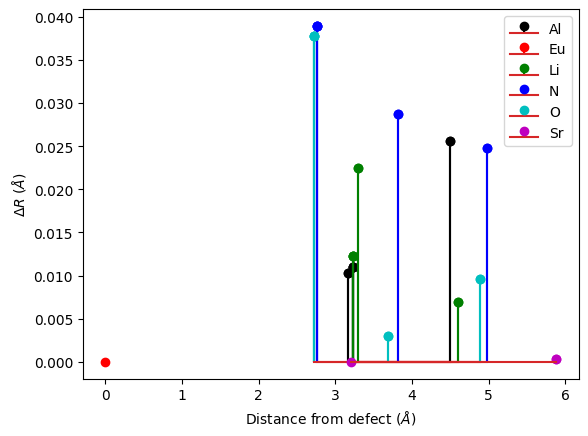

In [8]:
results.plot_delta_R_distance(defect_symbol="Eu");

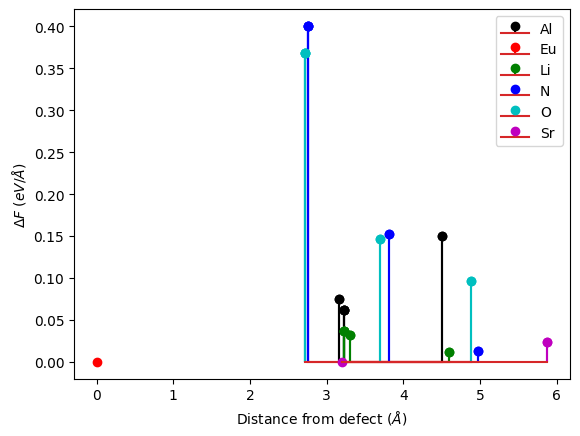

In [9]:
results.plot_delta_F_distance(defect_symbol="Eu");

In order to visualize these displacements on a VESTA structure, you can follow these steps.

(1) create a cif file with the ground state structure.
(2) Open the structure with VESTA software and save it in a .vesta format (this should be done manually).
(3) Use `draw_displacements_vesta()` method.

In [10]:
results.structure_gs().to(filename="gs_stru.cif")
# then open this cif with vesta, save it as .vesta file format

"# generated using pymatgen\ndata_Sr3Li8EuAl8(NO)8\n_symmetry_space_group_name_H-M   'P 1'\n_cell_length_a   8.00485096\n_cell_length_b   8.00485096\n_cell_length_c   6.39985978\n_cell_angle_alpha   90.00000000\n_cell_angle_beta   90.00000000\n_cell_angle_gamma   90.00000000\n_symmetry_Int_Tables_number   1\n_chemical_formula_structural   Sr3Li8EuAl8(NO)8\n_chemical_formula_sum   'Sr3 Li8 Eu1 Al8 N8 O8'\n_cell_volume   410.08790414\n_cell_formula_units_Z   1\nloop_\n _symmetry_equiv_pos_site_id\n _symmetry_equiv_pos_as_xyz\n  1  'x, y, z'\nloop_\n _atom_site_type_symbol\n _atom_site_label\n _atom_site_symmetry_multiplicity\n _atom_site_fract_x\n _atom_site_fract_y\n _atom_site_fract_z\n _atom_site_occupancy\n  Eu  Eu0  1  0.50000000  0.00000000  0.25000000  1\n  Sr  Sr1  1  0.50000000  0.00000000  0.75000000  1\n  Sr  Sr2  1  0.00000000  0.50000000  0.00009930  1\n  Sr  Sr3  1  0.00000000  0.50000000  0.49990070  1\n  Li  Li4  1  0.12568471  0.82654005  0.25000000  1\n  Li  Li5  1  0.1

In [11]:
results.draw_displacements_vesta(in_path="gs_stru.vesta",color_vector=[0, 0, 0])

Vesta files created and stored in : 
 /home/runner/work/abipy_book/abipy_book/abipy_book/lumabi/post_process_1D/VESTA_FILES


The resulting vesta file should look like:

<img src="draw_displacements_vesta.png" width="500">

You can modify the vectors drawing by changing the default arguments

In [12]:
help(results.draw_displacements_vesta)

Help on method draw_displacements_vesta in module abipy.lumi.deltaSCF:

draw_displacements_vesta(in_path, mass_weighted=False, scale_vector=20, width_vector=0.3, color_vector=(255, 0, 0), centered=True, factor_keep_vectors=0.1, out_path='VESTA_FILES', out_filename='gs_ex_relaxation') method of abipy.lumi.deltaSCF.DeltaSCF instance
    Draw the ground state to excited state atomic relaxation on a vesta structure.

    Args:
        in_path : path where the initial .vesta structure in stored, should correspond to the ground state relaxed structure.
        mass_weighted : If True, weight the displacements by the atomic masses. Draw the \Delta Q in that case.
        scale_vector : scaling factor of the vector modulus
        width_vector : vector width
        color_vector : color in rgb format
        centered : center the vesta structure around [0,0,0]
        factor_keep_vectors : draw only the eigenvectors with magnitude > factor_keep_vectors * max(magnitude)
        out_path : path 

## Luminescent properties following the 1D-CCM

One can visualize the 1D-CCM and associated displaced parabolas with

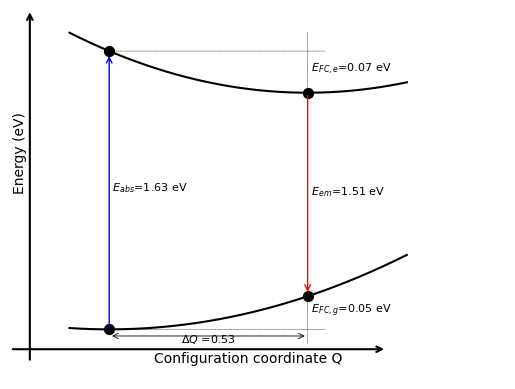

In [13]:
results.draw_displaced_parabolas();

or get a dataframe (or dictionary) with the main 1D-CCM parameters.

In [14]:
results.get_dataframe()
#results.get_dict_results()

E_em     E_abs     E_zpl   E_fc_gs   E_fc_ex  Delta_S  Delta_R   \
None  1.507326  1.630665  1.561932  0.054606  0.068734  0.12334  0.136238   

       Delta_Q  Eff_freq_gs  Eff_freq_ex      S_em     S_abs  
None  0.534574     0.039969     0.044842  1.366207  1.532787

Finally, one can plot the luminescence lineshape at 0 K:

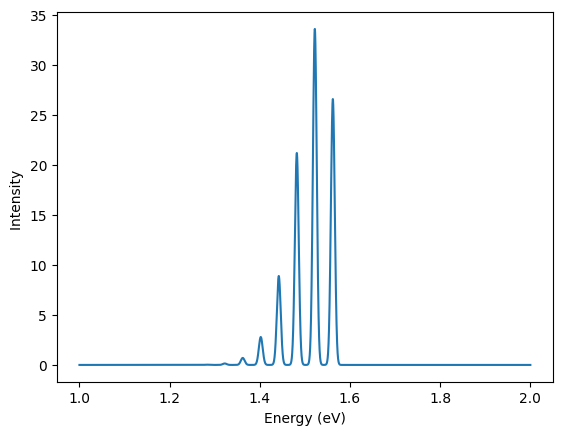

Help on method plot_lineshape_1D_zero_temp in module abipy.lumi.deltaSCF:

plot_lineshape_1D_zero_temp(energy_range=[0.5, 5], max_m=25, phonon_width=0.01, with_omega_cube='True', normalized='Area', ax=None, **kwargs) -> 'Figure' method of abipy.lumi.deltaSCF.DeltaSCF instance
    Plot the the emission lineshape following the effective phonon 1D-CCM at T=0K.
    NOT based on the generating function.

    Args:
        ax: |matplotlib-Axes| or None if a new figure should be created.
        energy_range:  Energy range at which the intensities are computed, ex : [0.5,5]
        max_m: Maximal vibrational state m considered
        phonon_width: fwhm of each phonon peak, in eV
        with_omega_cube: Considered or not the omega^3 dependence of the intensity
        normlized: Normalisation procedure. 'Area' if Area under the curve = 1. 'Sum' if maximum of the curve = 1.

    Returns: |matplotlib-Figure|




    Keyword arguments controlling the display of the figure:

    ================

In [15]:
results.plot_lineshape_1D_zero_temp(energy_range=[1,2]);
help(results.plot_lineshape_1D_zero_temp)